## Australian rainfall prediction

Goal: **To predict the next-day rain based on other atmospheric features**
    
Dataset: This dataset comprises a decade of daily weather observations from multiple locations across Australia.

### Data Description:
    
**Location** - Name of the city from Australia.

**MinTemp/MaxTemp** - The minimum/maximum temperature during a particular day. (degree Celsius)

**Rainfall** - Rainfall during a particular day. (millimeters)

**Evaporation** - Evaporation during a particular day. (millimeters)

**Sunshine** - Bright sunshine during a particular day. (hours)

**WindGusDir** - The direction of the strongest gust during a particular day. (16 compass points)

**WindGuSpeed** - Speed of strongest gust during a particular day. (kilometers per hour)

**WindDir9am / WindDir3pm** - The direction of the wind for 10 min prior to 9 am. / 3pm. (compass points)

**WindSpeed9am / WindSpeed3pm** - Speed of the wind for 10 min prior to 9 am. / 3pm. (kilometers per hour)

**Humidity9am / Humidity3pm** - The humidity of the wind at 9 am. / 3pm. (percent)

**Pressure9am / Pressure3pm** - Atmospheric pressure at 9 am. / 3pm. (hectopascals)

**Cloud9am / Cloud3pm** - Cloud-obscured portions of the sky at 9 am. / 3pm.(eighths)

**Temp9am / Temp3pm** - The temperature at 9 am. / 3pm.(degree Celsius)

**RainToday** - If today is rainy then ‘Yes’. If today is not rainy then ‘No’.

**RainTomorrow** - If tomorrow is rainy then 1 (Yes). If tomorrow is not rainy then 0 (No).

<div class="alert alert-block alert-success">The variables below were not presented in original dataset. However, I thought it would be wise to add regions and coordinates in order to plot the cities on the map (which I prepared in Tableau). Always better to see where the places  we are taking about are.

**State/Province** - State/Province of the locations in Australia

**Longitute/Latitude** - Coordinates of mentioned cities
</div>

It's a pity that there is no information about the date, however when we plot some variables I'm sure we will receive some seasonal trends in the data for example in min max temperature. 

It is also important to become acquainted with Australian climate especially in respect of rainfall before we will immerse in the analysis of our dataset. Here are some key aspects:
    
1. Australia is located in the Southern Hemisphere and is surrounded by oceans (Southern Ocean,Pacific Ocean, Indian Ocean) and seas (Timor Sea,Arafura Sea,Coral Sea, Tasman Sea).
2. Dry and arid regions particularly in the central and western regions. These areas experience hot and dry conditions for much of the year, with limited rainfall. They are characterized by vast deserts, such as the Simpson Desert and the Great Victoria Desert.
3. Northern parts of Australia have tropical / subtropical climate - wet/dry seasons; monsoon seasons (wet) - from November to April,heavy rainfall,tropical cyclones; dry seasons - from May to October, lower humidity, clear skies
4. Southern / Southeastern regions have temparate climate - mild winters, moderate summers, rainfall throughout the year
5. Southern / Southwestern parts have mediterranean climate - mild, wet winters and hot,dry summers
6. Apline climate in southeastern regions (particularly the Australian Alps) - cold winters,snowfall,cool summers, higher rainfall due to orographic effects(rainfall caused by the lifting of moist air over mountains)
7. Coastale areas have mild temperatures and high humidity
8. Australia is prone to natural disasters, including tropical cyclones in the north and bushfires in various parts of the country.

To conclude: Australia's climate is highly diverse and can be broadly classified into several distinct regions based on precipitation patterns

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_data=pd.read_csv("Weather Data.csv")
raw_data.head()

,row ID,Location,State/Province,Latitude,Longitute,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,New South Wales,-36.0737,146.9135,13.4,22.9,0.6,NaN,NaN,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,New South Wales,-36.0737,146.9135,7.4,25.1,0.0,NaN,NaN,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,New South Wales,-36.0737,146.9135,17.5,32.3,1.0,NaN,NaN,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,New South Wales,-36.0737,146.9135,14.6,29.7,0.2,NaN,NaN,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,New South Wales,-36.0737,146.9135,7.7,26.7,0.0,NaN,NaN,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [3]:
weather_data = raw_data.copy()
weather_data = weather_data.drop(['row ID'],axis=1)
weather_data.info()
# 25 columns, 99516 rows
#there are some nulls 
#types: object, float64,int64
#categorical variables: location, state/province, coordinates
#min,max temp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        99516 non-null  object 
 1   State/Province  99516 non-null  object 
 2   Latitude        99516 non-null  float64
 3   Longitute       99516 non-null  float64
 4   MinTemp         99073 non-null  float64
 5   MaxTemp         99286 non-null  float64
 6   Rainfall        98537 non-null  float64
 7   Evaporation     56985 non-null  float64
 8   Sunshine        52199 non-null  float64
 9   WindGustDir     92995 non-null  object 
 10  WindGustSpeed   93036 non-null  float64
 11  WindDir9am      92510 non-null  object 
 12  WindDir3pm      96868 non-null  object 
 13  WindSpeed9am    98581 non-null  float64
 14  WindSpeed3pm    97681 non-null  float64
 15  Humidity9am     98283 non-null  float64
 16  Humidity3pm     97010 non-null  float64
 17  Pressure9am     89768 non-null 

In [4]:
weather_data.shape

(99516, 25)

In [5]:
weather_data.describe(include="all")

,Location,State/Province,Latitude,Longitute,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,99516,99516,99516.000000,99516.000000,99073.000000,99286.000000,98537.000000,56985.00000,52199.000000,92995,...,98283.000000,97010.000000,89768.000000,89780.000000,61944.000000,59514.000000,98902.000000,97612.000000,98537,99516.000000
unique,49,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,Canberra,New South Wales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
freq,2393,29037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6843,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76481,NaN
mean,NaN,NaN,-32.757384,142.072181,12.176266,23.218513,2.353024,5.46132,7.615090,NaN,...,68.866376,51.433296,1017.684638,1015.286204,4.447985,4.519122,16.970041,21.681340,NaN,0.224677
std,NaN,NaN,6.013438,12.077971,6.390882,7.115072,8.487866,4.16249,3.783008,NaN,...,19.074951,20.777616,7.110166,7.045189,2.886580,2.716618,6.488961,6.931681,NaN,0.417372
min,NaN,NaN,-42.882100,115.100700,-8.500000,-4.100000,0.000000,0.00000,0.000000,NaN,...,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.000000,-5.100000,NaN,0.000000
25%,NaN,NaN,-36.073700,138.600700,7.600000,17.900000,0.000000,2.60000,4.800000,NaN,...,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000,NaN,0.000000
50%,NaN,NaN,-33.946200,145.834100,12.000000,22.600000,0.000000,4.80000,8.400000,NaN,...,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000,NaN,0.000000
75%,NaN,NaN,-31.498100,150.737800,16.800000,28.200000,0.800000,7.40000,10.600000,NaN,...,83.000000,65.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.400000,NaN,0.000000


In [6]:
#Missing values
NA_data = weather_data.isnull().sum()
NA_data

Location              0
State/Province        0
Latitude              0
Longitute             0
MinTemp             443
MaxTemp             230
Rainfall            979
Evaporation       42531
Sunshine          47317
WindGustDir        6521
WindGustSpeed      6480
WindDir9am         7006
WindDir3pm         2648
WindSpeed9am        935
WindSpeed3pm       1835
Humidity9am        1233
Humidity3pm        2506
Pressure9am        9748
Pressure3pm        9736
Cloud9am          37572
Cloud3pm          40002
Temp9am             614
Temp3pm            1904
RainToday           979
RainTomorrow          0
dtype: int64

In [7]:
NA_percentage = round(NA_data / weather_data.shape[0] *100,1)

In [8]:
print("Percentage of missing values in each column: \n{}".format(NA_percentage))

Percentage of missing values in each column: 
Location           0.0
State/Province     0.0
Latitude           0.0
Longitute          0.0
MinTemp            0.4
MaxTemp            0.2
Rainfall           1.0
Evaporation       42.7
Sunshine          47.5
WindGustDir        6.6
WindGustSpeed      6.5
WindDir9am         7.0
WindDir3pm         2.7
WindSpeed9am       0.9
WindSpeed3pm       1.8
Humidity9am        1.2
Humidity3pm        2.5
Pressure9am        9.8
Pressure3pm        9.8
Cloud9am          37.8
Cloud3pm          40.2
Temp9am            0.6
Temp3pm            1.9
RainToday          1.0
RainTomorrow       0.0
dtype: float64


In [ ]:
#Insights: 
#1. Are the missing values clustered in specific regions? 
#2. We can impute missing values using mean,median,mode -> this approach helps maintain the general distribution of the data
# Problem: it may introduce bias, we might observe some patterns etc. since the Na's are not missing at random
#3. We may use interpolation to estimate missing values
#4. Another option is to create binary indicators for example for cloud cover such as "cloudy","not cloudy"

## Location

In [9]:
weather_data['Location'].value_counts()
#Why are there the most observations from Canberra,Sydney,Perth,Hobart..? Why this kind of hirarchy? How did they get this proportions?
#Well.. Firstly, these cities are the biggest, the most populous. Secondly, I noticed that the first listed cities are located in different regions on the map. 
#We distinguish 9 states/provinces, and the first 7 cities belongs to the 7 different regions. Circumstance? 

Canberra            2393
Sydney              2361
Perth               2262
Hobart              2239
Darwin              2217
Brisbane            2202
Adelaide            2178
PerthAirport        2167
Albury              2142
MountGambier        2140
MelbourneAirport    2139
Mildura             2124
Ballarat            2122
AliceSprings        2119
Watsonia            2113
Portland            2113
Bendigo             2110
Nuriootpa           2110
Townsville          2106
Cairns              2101
SydneyAirport       2100
Tuggeranong         2099
Newcastle           2096
Sale                2093
Wollongong          2090
Cobar               2090
Launceston          2072
WaggaWagga          2068
Dartmoor            2067
CoffsHarbour        2066
Witchcliffe         2060
Richmond            2060
Penrith             2059
GoldCoast           2057
Woomera             2053
Albany              2051
BadgerysCreek       2041
NorfolkIsland       2038
SalmonGums          2031
NorahHead           2028


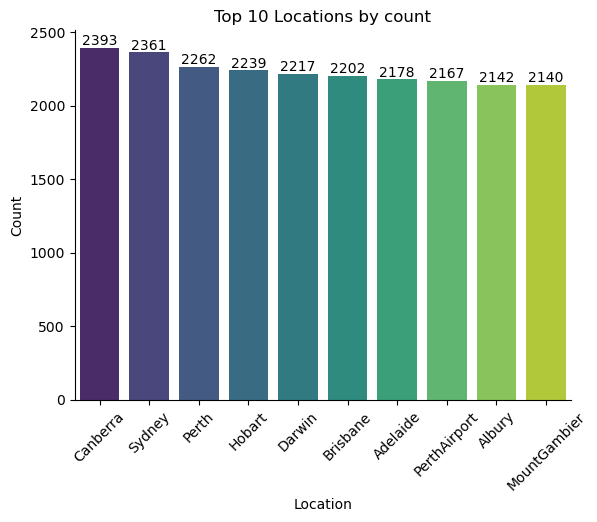

In [10]:
#type(weather_data['Location'].value_counts()) #pandas.core.series.Series
#weather_data['Location'].value_counts().index
#weather_data['Location'].value_counts().index[:10]
#weather_data['Location'].value_counts()[:10]

location_counts = weather_data['Location'].value_counts()
first_names = location_counts.index[:10]
first_counts = location_counts[:10]

sns.barplot(x=first_names, y=first_counts,palette='viridis')

plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Top 10 Locations by count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

sns.despine()  # Remove the top and right spines

# Add annotations for each bar
for index, value in enumerate(first_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')
    
# e.g.if first_counts is [10, 25, 15, 30, 20], the enumerate() function will yield the following tuples: (0, 10), (1, 25), (2, 15), (3, 30), and (4, 20).
# index: The x-coordinate at which the text will be placed
# value: The y-coordinate at which the text will be placed
# str(value): The text that will be displayed at the specified coordinates
# ha - horizontal alignment
# va - vertical alignment
plt.show()

## State/Province

In [11]:
weather_data['State/Province'].value_counts()

 New South Wales                29037
 Victoria                       19712
 Western Australia              14513
 South Australia                 8481
 Queensland                      8466
Australian Capital Territory     6517
 Northern Territory              6441
 Tasmania                        4311
 Norfolk Island                  2038
Name: State/Province, dtype: int64

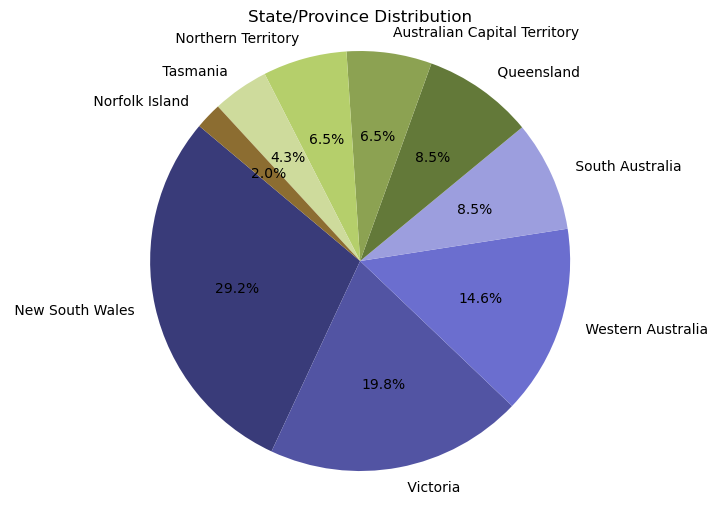

In [12]:
state_counts = weather_data['State/Province'].value_counts()

plt.figure(figsize=(8, 6))  #specifies the width and height of the figure in inches
sns.set_palette('tab20b')  

plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140)

# autopct='%1.1f%%' - automatic percentage -> to display the percentage of each wedge(category)
# f - float, 1.1 - one digit after decimal point, %% - escape sequence to display % symbol
# By default, the first wedge starts from the positive x-axis (0 degrees) and proceeds counterclockwise - startangle

plt.title('State/Province Distribution')

plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

## Min / Max temperature

In [ ]:
weather_data['Sunshine'].nunique()

In [ ]:
sorted(weather_data['Sunshine'].unique())

In [ ]:
sorted(weather_data['Cloud9am'].unique())

In [ ]:
weather_data['Rainfall'].nunique()